## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -1.345130 -0.122989 -0.593449 -1.453565 -1.267441 -2.229780
1  1.332581 -1.402668 -0.233079  0.980926  0.652817 -0.021635
2 -1.712329  0.580568 -0.279936  1.154111 -1.416610 -1.106789
3  0.048723 -1.208099  0.375776  0.679603 -0.207904 -0.459213
4 -0.553859  1.923905 -0.373187 -1.061519  0.799368  0.050111


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9843784	total: 58ms	remaining: 57.9s
1:	learn: 0.9758813	total: 58.5ms	remaining: 29.2s
2:	learn: 0.9664579	total: 59.1ms	remaining: 19.6s
3:	learn: 0.9564148	total: 59.5ms	remaining: 14.8s
4:	learn: 0.9484686	total: 60.1ms	remaining: 12s
5:	learn: 0.9377687	total: 60.7ms	remaining: 10.1s
6:	learn: 0.9291263	total: 61.3ms	remaining: 8.69s
7:	learn: 0.9203623	total: 61.8ms	remaining: 7.66s
8:	learn: 0.9115633	total: 62.2ms	remaining: 6.84s
9:	learn: 0.9027125	total: 62.8ms	remaining: 6.22s
10:	learn: 0.8928730	total: 63.3ms	remaining: 5.69s
11:	learn: 0.8824334	total: 63.7ms	remaining: 5.25s
12:	learn: 0.8743975	total: 64.2ms	remaining: 4.87s
13:	learn: 0.8672054	total: 64.6ms	remaining: 4.55s
14:	learn: 0.8589414	total: 65ms	remaining: 4.27s
15:	learn: 0.8507829	total: 65.5ms	remaining: 4.03s
16:	learn: 0.8441205	total: 66ms	remaining: 3.82s
17:	learn: 0.8357746	total: 66.5ms	remaining: 3.63s
18:	learn: 0.8281657	total: 67ms	remaining: 3.46s
19

104:	learn: 0.3973174	total: 107ms	remaining: 908ms
105:	learn: 0.3941947	total: 107ms	remaining: 904ms
106:	learn: 0.3914286	total: 108ms	remaining: 898ms
107:	learn: 0.3886279	total: 108ms	remaining: 892ms
108:	learn: 0.3862959	total: 108ms	remaining: 886ms
109:	learn: 0.3836741	total: 109ms	remaining: 880ms
110:	learn: 0.3807144	total: 109ms	remaining: 874ms
111:	learn: 0.3777286	total: 110ms	remaining: 870ms
112:	learn: 0.3746368	total: 110ms	remaining: 865ms
113:	learn: 0.3714157	total: 111ms	remaining: 859ms
114:	learn: 0.3685400	total: 111ms	remaining: 854ms
115:	learn: 0.3659099	total: 112ms	remaining: 850ms
116:	learn: 0.3633643	total: 112ms	remaining: 846ms
117:	learn: 0.3602026	total: 113ms	remaining: 841ms
118:	learn: 0.3574332	total: 113ms	remaining: 836ms
119:	learn: 0.3542117	total: 113ms	remaining: 832ms
120:	learn: 0.3516543	total: 114ms	remaining: 826ms
121:	learn: 0.3490495	total: 114ms	remaining: 822ms
122:	learn: 0.3463816	total: 115ms	remaining: 818ms
123:	learn: 

281:	learn: 0.1162181	total: 187ms	remaining: 476ms
282:	learn: 0.1156093	total: 188ms	remaining: 475ms
283:	learn: 0.1148689	total: 188ms	remaining: 474ms
284:	learn: 0.1140577	total: 189ms	remaining: 473ms
285:	learn: 0.1133315	total: 190ms	remaining: 474ms
286:	learn: 0.1124923	total: 190ms	remaining: 472ms
287:	learn: 0.1118701	total: 190ms	remaining: 471ms
288:	learn: 0.1112055	total: 191ms	remaining: 470ms
289:	learn: 0.1103463	total: 191ms	remaining: 468ms
290:	learn: 0.1097787	total: 192ms	remaining: 467ms
291:	learn: 0.1089828	total: 192ms	remaining: 466ms
292:	learn: 0.1082962	total: 193ms	remaining: 465ms
293:	learn: 0.1077797	total: 193ms	remaining: 464ms
294:	learn: 0.1069489	total: 194ms	remaining: 463ms
295:	learn: 0.1061744	total: 194ms	remaining: 462ms
296:	learn: 0.1055946	total: 195ms	remaining: 461ms
297:	learn: 0.1048266	total: 195ms	remaining: 460ms
298:	learn: 0.1040626	total: 196ms	remaining: 459ms
299:	learn: 0.1033251	total: 196ms	remaining: 458ms
300:	learn: 

494:	learn: 0.0341634	total: 290ms	remaining: 296ms
495:	learn: 0.0340008	total: 290ms	remaining: 295ms
496:	learn: 0.0337998	total: 291ms	remaining: 294ms
497:	learn: 0.0336014	total: 291ms	remaining: 294ms
498:	learn: 0.0334289	total: 292ms	remaining: 293ms
499:	learn: 0.0333325	total: 292ms	remaining: 292ms
500:	learn: 0.0331758	total: 293ms	remaining: 292ms
501:	learn: 0.0330821	total: 293ms	remaining: 291ms
502:	learn: 0.0329253	total: 294ms	remaining: 290ms
503:	learn: 0.0328338	total: 294ms	remaining: 290ms
504:	learn: 0.0326450	total: 295ms	remaining: 289ms
505:	learn: 0.0325681	total: 295ms	remaining: 288ms
506:	learn: 0.0323737	total: 296ms	remaining: 288ms
507:	learn: 0.0322104	total: 296ms	remaining: 287ms
508:	learn: 0.0320880	total: 297ms	remaining: 286ms
509:	learn: 0.0320099	total: 297ms	remaining: 286ms
510:	learn: 0.0318214	total: 298ms	remaining: 285ms
511:	learn: 0.0316653	total: 298ms	remaining: 284ms
512:	learn: 0.0315847	total: 298ms	remaining: 283ms
513:	learn: 

662:	learn: 0.0155295	total: 370ms	remaining: 188ms
663:	learn: 0.0154642	total: 370ms	remaining: 187ms
664:	learn: 0.0153906	total: 371ms	remaining: 187ms
665:	learn: 0.0153282	total: 371ms	remaining: 186ms
666:	learn: 0.0152643	total: 372ms	remaining: 186ms
667:	learn: 0.0152020	total: 372ms	remaining: 185ms
668:	learn: 0.0151349	total: 373ms	remaining: 184ms
669:	learn: 0.0150551	total: 373ms	remaining: 184ms
670:	learn: 0.0149883	total: 374ms	remaining: 183ms
671:	learn: 0.0149105	total: 374ms	remaining: 183ms
672:	learn: 0.0148456	total: 375ms	remaining: 182ms
673:	learn: 0.0147696	total: 375ms	remaining: 181ms
674:	learn: 0.0147058	total: 376ms	remaining: 181ms
675:	learn: 0.0146466	total: 376ms	remaining: 180ms
676:	learn: 0.0145843	total: 376ms	remaining: 180ms
677:	learn: 0.0144969	total: 377ms	remaining: 179ms
678:	learn: 0.0144358	total: 377ms	remaining: 178ms
679:	learn: 0.0143781	total: 378ms	remaining: 178ms
680:	learn: 0.0143183	total: 378ms	remaining: 177ms
681:	learn: 

884:	learn: 0.0084524	total: 473ms	remaining: 61.5ms
885:	learn: 0.0084231	total: 474ms	remaining: 61ms
886:	learn: 0.0084140	total: 474ms	remaining: 60.4ms
887:	learn: 0.0084062	total: 475ms	remaining: 59.9ms
888:	learn: 0.0083758	total: 475ms	remaining: 59.4ms
889:	learn: 0.0083491	total: 476ms	remaining: 58.8ms
890:	learn: 0.0083079	total: 477ms	remaining: 58.3ms
891:	learn: 0.0082934	total: 477ms	remaining: 57.8ms
892:	learn: 0.0082577	total: 477ms	remaining: 57.2ms
893:	learn: 0.0082435	total: 478ms	remaining: 56.7ms
894:	learn: 0.0082346	total: 479ms	remaining: 56.2ms
895:	learn: 0.0081996	total: 480ms	remaining: 55.7ms
896:	learn: 0.0081761	total: 480ms	remaining: 55.2ms
897:	learn: 0.0081674	total: 481ms	remaining: 54.6ms
898:	learn: 0.0081422	total: 481ms	remaining: 54.1ms
899:	learn: 0.0081282	total: 482ms	remaining: 53.5ms
900:	learn: 0.0081143	total: 482ms	remaining: 53ms
901:	learn: 0.0081057	total: 483ms	remaining: 52.4ms
902:	learn: 0.0080921	total: 483ms	remaining: 51.9

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

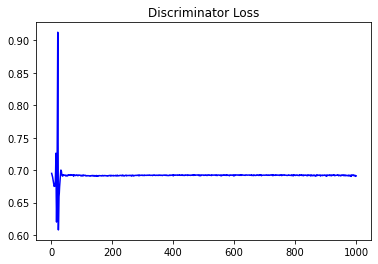

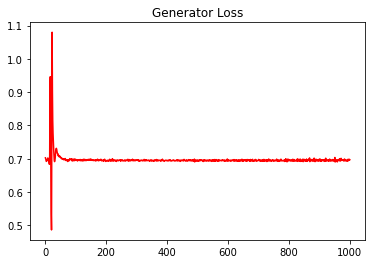

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.15683136975295


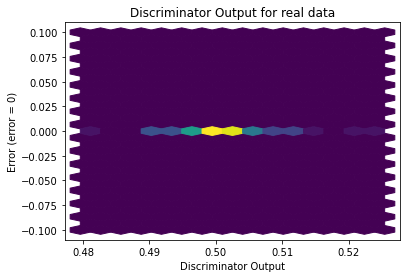

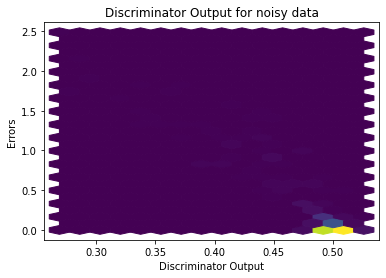

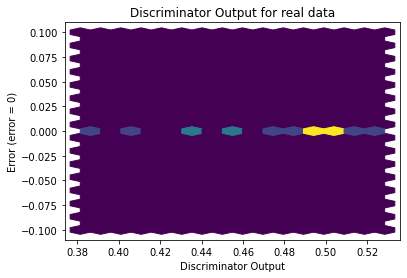

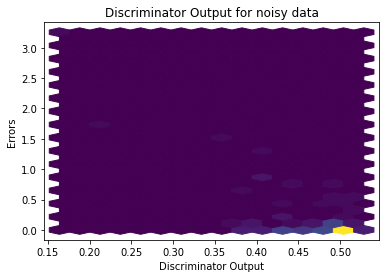

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


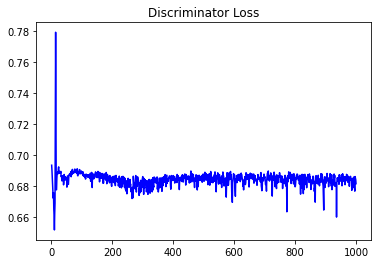

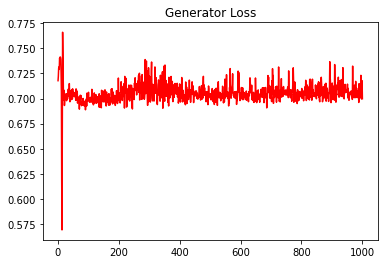

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.10879064201773533


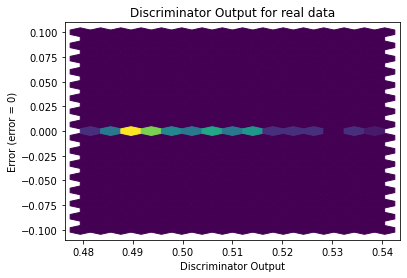

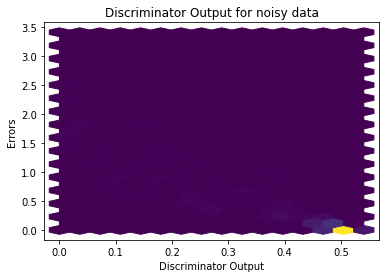

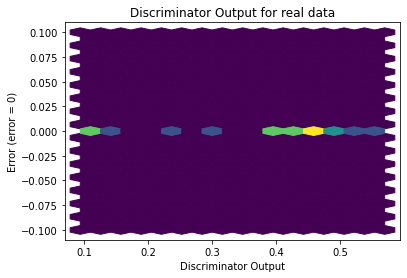

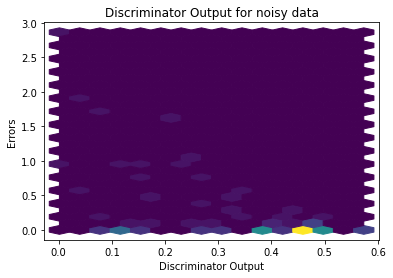

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1415]], requires_grad=True)
